In [1]:
library(ggthemes)
library(ggplot2)
library(ggpubr)
library(repr)
options(repr.plot.width=6, repr.plot.height=5)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: magrittr


In [2]:
data <- read.csv(file="~/Downloads/wines.csv", header=TRUE, sep=";")
head(data, 5)

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1  7.4          0.70             0.00        1.9            0.076    
2  7.8          0.88             0.00        2.6            0.098    
3  7.8          0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5  7.4          0.70             0.00        1.9            0.076    
  free.sulfur.dioxide total.sulfur.dioxide density pH   sulphates alcohol
1 11                  34                   0.9978  3.51 0.56      9.4    
2 25                  67                   0.9968  3.20 0.68      9.8    
3 15                  54                   0.9970  3.26 0.65      9.8    
4 17                  60                   0.9980  3.16 0.58      9.8    
5 11                  34                   0.9978  3.51 0.56      9.4    
  quality color sweetnes
1 5       red   dry     
2 5       red   dry     
3 5       red   dry     
4 6       red   dry     
5 5       red   dry

### Sort the table by column &quot;quality&quot;, and then by &quot;alcohol&quot;, in both cases in descending order (ie. wines of the same quality should be sorted according to alcohol content).Display the first 30 lines of the sorted table.

In [3]:
head(data[order(data[["quality"]], data[["alcohol"]], decreasing = c(TRUE, TRUE)),], 30)

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
3205  7.1          0.26             0.49         2.20          0.032    
2476  6.9          0.36             0.34         4.20          0.018    
2427  7.4          0.24             0.36         2.00          0.031    
2420  6.6          0.36             0.29         1.60          0.021    
2374  9.1          0.27             0.45        10.60          0.035    
589   5.0          0.42             0.24         2.00          0.060    
1270  5.5          0.49             0.03         1.80          0.044    
4545  4.9          0.33             0.31         1.20          0.016    
456  11.3          0.62             0.67         5.20          0.086    
5076  6.2          0.37             0.24         6.10          0.032    
5082  5.4          0.45             0.27         6.40          0.033    
5084  6.2          0.37             0.24         6.10          0.032    
5354  5.4          0.46             0.15         2.10          0.026    
5364  5.4          0.46             0.15         2.10          0.026    
5795  7.1          0.45             0.24         2.70          0.040    
5068  6.6          0.16             0.36         1.10          0.031    
5259  5.4          0.53             0.16         2.70          0.036    
5265  5.4          0.53             0.16         2.70          0.036    
1121  7.9          0.54             0.34         2.50          0.076    
5022  6.2          0.28             0.28         4.30          0.026    
5767  6.3          0.17             0.32         1.00          0.040    
4522  6.5          0.44             0.47         5.45          0.014    
4565  5.5          0.34             0.26         2.20          0.021    
5260  5.8          0.32             0.28         4.30          0.032    
5267  5.8          0.32             0.28         4.30          0.032    
5272  7.3          0.41             0.29         1.80          0.032    
6365  5.2          0.30             0.34         1.50          0.038    
391   5.6          0.85             0.05         1.40          0.045    
2042  6.0          0.25             0.28         2.20          0.026    
4891  5.6          0.12             0.33         2.90          0.044    
     free.sulfur.dioxide total.sulfur.dioxide density pH   sulphates alcohol
3205 31                  113                  0.99030 3.37 0.42      12.9   
2476 57                  119                  0.98980 3.28 0.36      12.7   
2427 27                  139                  0.99055 3.28 0.48      12.5   
2420 24                   85                  0.98965 3.41 0.61      12.4   
2374 28                  124                  0.99700 3.20 0.46      10.4   
589  19                   50                  0.99170 3.72 0.74      14.0   
1270 28                   87                  0.99080 3.50 0.82      14.0   
4545 39                  150                  0.98713 3.33 0.59      14.0   
456   6                   19                  0.99880 3.22 0.69      13.4   
5076 19                   86                  0.98934 3.04 0.26      13.4   
5082 20                  102                  0.98944 3.22 0.27      13.4   
5084 19                   86                  0.98934 3.04 0.26      13.4   
5354 29                  130                  0.98953 3.39 0.77      13.4   
5364 29                  130                  0.98953 3.39 0.77      13.4   
5795 24                   87                  0.98862 2.94 0.38      13.4   
5068 27                   93                  0.98884 3.23 0.34      13.2   
5259 34                  128                  0.98856 3.20 0.53      13.2   
5265 34                  128                  0.98856 3.20 0.53      13.2   
1121  8                   17                  0.99235 3.20 0.72      13.1   
5022 22                  105                  0.98900 2.98 0.64      13.1   
5767 39                  118                  0.98886 3.31 0.40      13.1   
4522 44                  137                  0.

### Determine the number of observations and variables.

In [4]:
cat("Observations : ", dim(data)[1], "Variables : ", dim(data)[2])

Observations :  6497 Variables :  14

### How many observations are complete?

In [5]:
cat("Complete cases: ", nrow(data[complete.cases(data),]), "out of:",nrow(data))

Complete cases:  6495 out of: 6497

### How many observations describe white wines, and how many red ones?

In [6]:
summary(data$color)

red white 
 1599  4898

In [7]:
library("dplyr")
data %>%                    
  group_by(color) %>% 
  summarize(count=n())


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



color count
1 red   1599 
2 white 4898

### Write a function varSummary(var) which calculates: mean, standard deviation and range for a vector passed as a function argument. The calculated values ​​should be printed to the console as a single line. Values should be separated by space. For each continuous variable in the data frame call &#39;&#39;varSummary&#39;&#39; function in a loop.

In [8]:
avrSummary <- function(var) {
   cat(mean(var),sd(var), range(var), sep=" ") # "\n" in case if you want 
}

In [9]:
str(data)

'data.frame':	6497 obs. of  14 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ color               : Factor w/ 2 levels "red","white": 1 1 1 1 1 1 1 1 1 1 ...


In [10]:
data <- na.omit(data)

for(i in names(data)){
    if (is.numeric(data[[i]])) {
            #print(cat("\n",i, "\n"))
            avrSummary(data[[i]])
  } else {
    NA
  }    
}

7.215343 1.296602 3.8 15.90.3396428 0.1646559 0.08 1.580.3186697 0.1453125 0 1.665.444219 4.758206 0.6 65.80.05602879 0.03503741 0.009 0.61130.52979 17.74988 1 289115.7665 56.51481 6 4400.9946961 0.002998818 0.98711 1.038983.218423 0.160749 2.72 4.010.5312256 0.1488085 0.22 210.4918 1.192813 8 14.95.818476 0.8733278 3 9

### For each type of wine (dry, medium dry, ...) call “varSummary” function for a variable “quality”

In [11]:
# line mode
avrSummary <- function(var) {
   return(c(mean(var), sd(var), range(var))) 
}
dt = na.omit(data)  
by(dt[,c("quality")], dt$sweetnes, avrSummary)

dt$sweetnes: dry
[1] 5.8226394 0.8850291 3.0000000 9.0000000
------------------------------------------------------------ 
dt$sweetnes: medium dry
[1] 5.8346080 0.8765979 3.0000000 9.0000000
------------------------------------------------------------ 
dt$sweetnes: semi-sweet
[1] 5.7599040 0.8115607 3.0000000 8.0000000
------------------------------------------------------------ 
dt$sweetnes: sweet
[1]  6 NA  6  6

In [12]:
#And as the dataframe
avrSummary <- function(var) {
   return(c(mean(var),sd(var), range(var, na.rm = FALSE))) 
}

data %>%  
  na.omit() %>%
  group_by(sweetnes)  %>%
  do(total = avrSummary(.$quality)) %>%
  summarise(sweetnes, mean = total[1],sd = total[2], min=total[3], max=total[4])

sweetnes   mean     sd        min max
1 dry        5.822639 0.8850291 3   9  
2 medium dry 5.834608 0.8765979 3   9  
3 semi-sweet 5.759904 0.8115607 3   8  
4 sweet      6.000000        NA 6   6

### Draw a box plot for &quot;residual sugar&quot; variable grouped by the type of wine (dry, medium dry, ...).

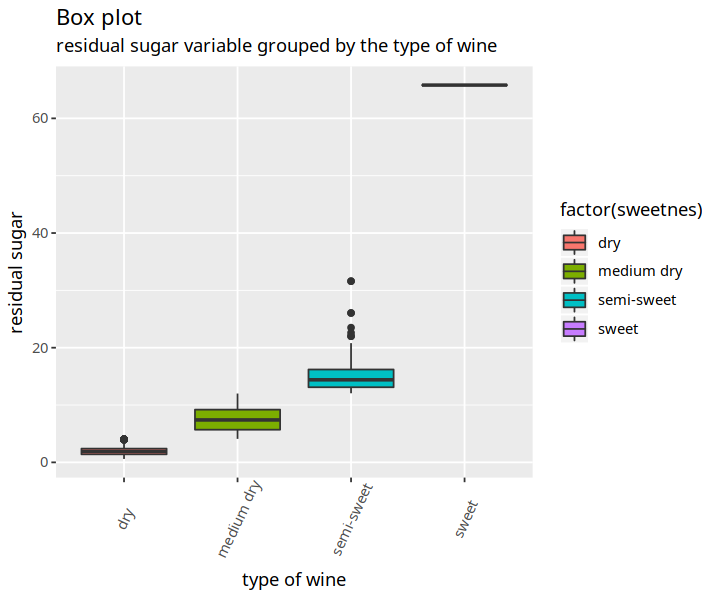

In [13]:
g <- ggplot(data, aes(sweetnes, residual.sugar))
g + geom_boxplot(aes(fill=factor(sweetnes))) + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  labs(title="Box plot", 
       subtitle="residual sugar variable grouped by the type of wine ",
       x="type of wine",
       y="residual sugar")



### Calculate how many wines are in each sweetness category.

In [14]:
data %>%  
  na.omit() %>%
  group_by(sweetnes)  %>%
  tally()

sweetnes   n   
1 dry        3569
2 medium dry 2092
3 semi-sweet  833
4 sweet         1

### Draw a histogram of wine quality.

In [15]:
library(psych)
di <- describe(data)
di[c("quality"),]


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



vars n    mean     sd        median trimmed  mad    min max range
quality 12   6495 5,818476 0,8733278 6      5,787185 1,4826 3   9   6    
        skew      kurtosis  se        
quality 0,1893349 0,2299432 0,01083647

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

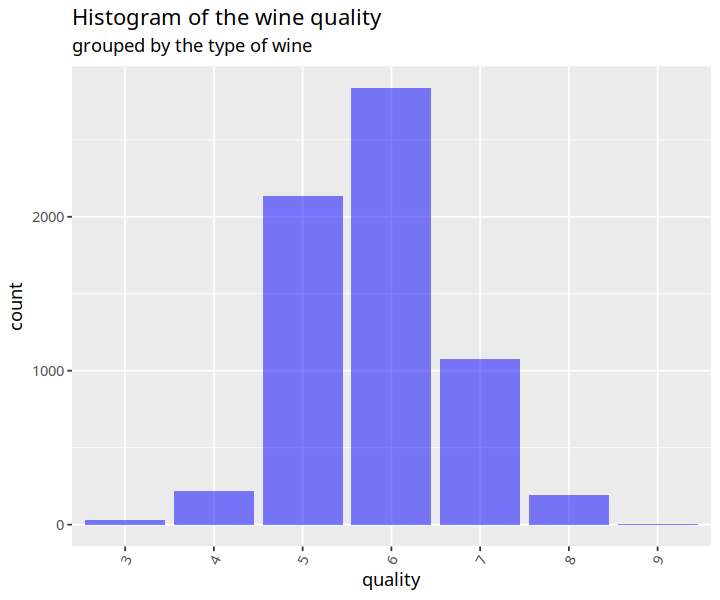

In [16]:
ggplot(data, aes(x=factor(data$quality))) +
  geom_histogram(fill="blue", alpha=0.5, stat="count") +
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  xlab("quality") +
  labs(title="Histogram of the wine quality", 
       subtitle="grouped by the type of wine")

### Draw a histogram of the wine quality grouped by the type of wine.

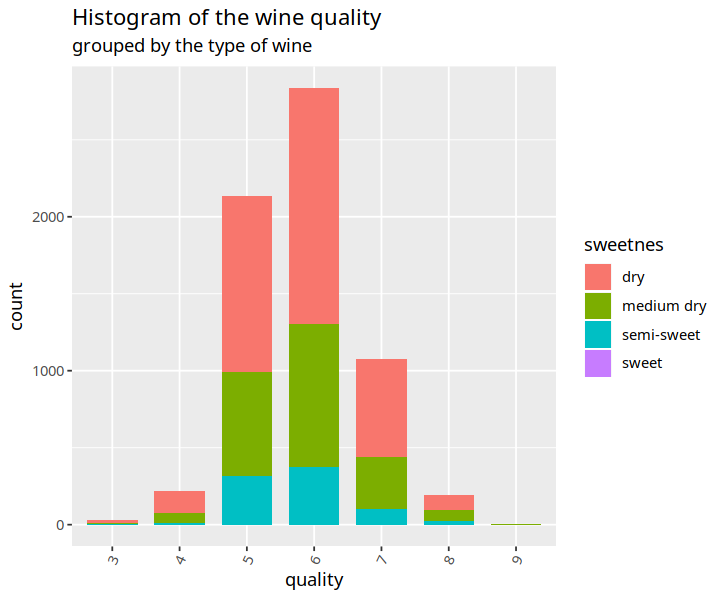

In [17]:
g <- ggplot(data, aes(x=factor(data$quality)))
g + geom_bar(aes(fill=sweetnes), width = 0.75) + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  xlab("quality") +
  labs(title="Histogram of the wine quality", 
       subtitle="grouped by the type of wine")

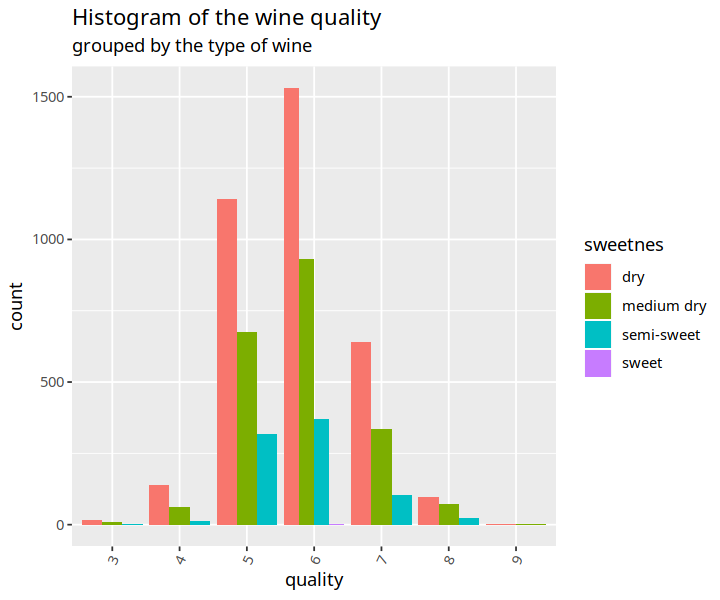

In [18]:
ggplot(data, aes(x=factor(data$quality), fill = sweetnes)) +
  geom_bar(position = position_dodge()) +
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  xlab("quality") +
  labs(title="Histogram of the wine quality", 
       subtitle="grouped by the type of wine") 


### Draw a graph showing the density function for the wine quality grouped by the type of wine.

Warning message:
“Groups with fewer than two data points have been dropped.”

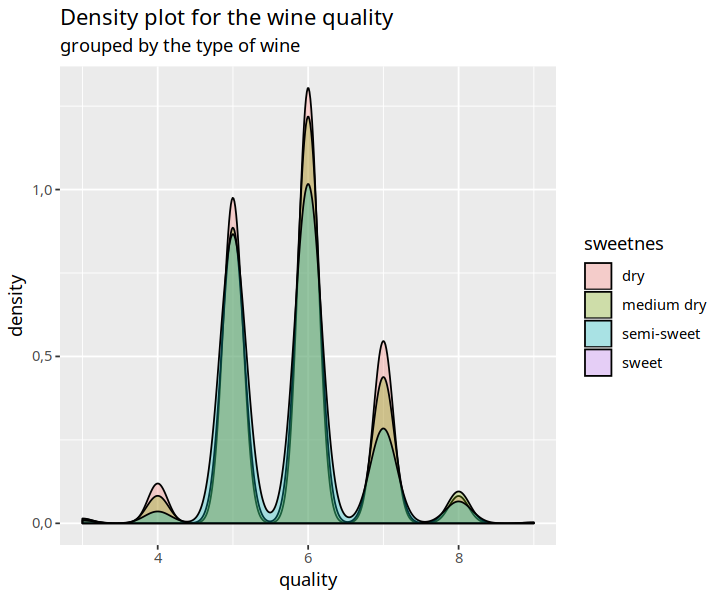

In [19]:
g <- ggplot(data, aes(quality))
g + geom_density(aes(fill=factor(sweetnes)), alpha=0.3) + 
    labs(title="Density plot for the wine quality", 
         subtitle="grouped by the type of wine",
         x="quality",
         fill="sweetnes")

Warning message:
“Groups with fewer than two data points have been dropped.”

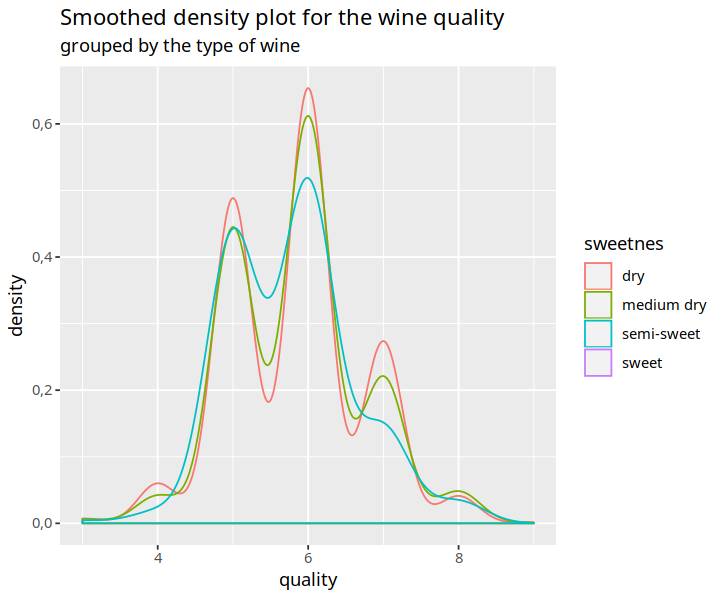

In [20]:
#smoothed density
p1<-ggplot() + 
  geom_density(data=data, aes(x=quality, group=sweetnes, color=sweetnes), adjust=2) + 
  labs(title="Smoothed density plot for the wine quality", 
         subtitle="grouped by the type of wine",
         x="quality",
         fill="sweetnes")
p1

### Calculate correlations for all possible pairs of variables in the data set.

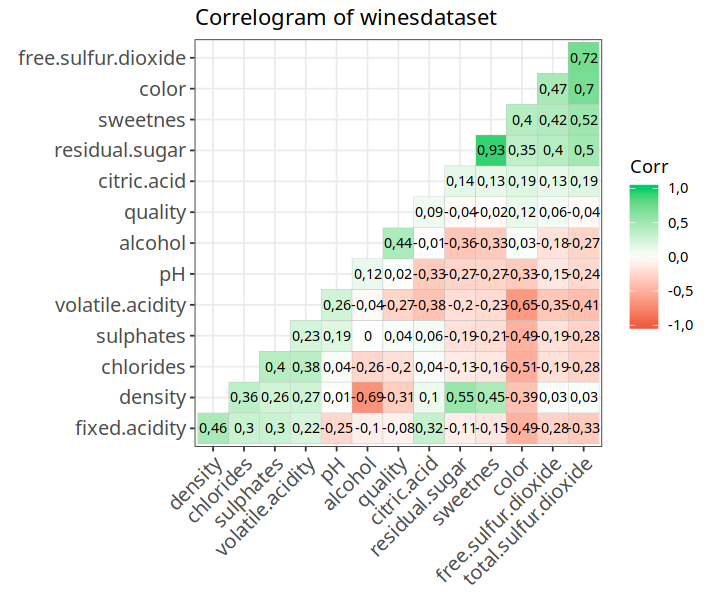

In [21]:
#Preprocessing
library(ggcorrplot)

data <- na.omit(data) 
cat_sweet <-levels(data$sweetnes)
cat_color <-levels(data$color)

for(i in names(data)){
    if (is.numeric(data[[i]])) {
NA
  } else {
    data[[i]] = as.integer(data[[i]])
  }    
}


corr <- cor(as.matrix(data))

# Plot
ggcorrplot(corr, hc.order = TRUE, 
           type = "lower", 
           lab = TRUE, 
           lab_size = 3, 

           colors = c("tomato2", "white", "springgreen3"), 
           title="Correlogram of winesdataset", 
           ggtheme=theme_bw)

### Draw scatter plots of three pairs of the most correlated variables.

In [22]:
###table of the most correlated variables
library(data.table)
df= subset(setDT(melt(corr))[order(-value)], Var1!=Var2) %>% #extract var names and order descending + remove autocorrelation
    dplyr::filter(row_number() %% 2 != 0) %>% # remove duplicates
    mutate(abs.corr = abs(value)) %>% # calc abs of correlation
    arrange(desc(abs.corr)) %>%
    top_n(5) #5 to show that we took into consederation also strong negative correlation


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

Selecting by abs.corr


In [23]:
df$Var1 <- as.character(df$Var1)
df$Var2 <- as.character(df$Var2)
df

Var1                 Var2                 value      abs.corr 
1 sweetnes             residual.sugar        0,9313284 0,9313284
2 total.sulfur.dioxide free.sulfur.dioxide   0,7208518 0,7208518
3 color                total.sulfur.dioxide  0,7002030 0,7002030
4 alcohol              density              -0,6867372 0,6867372
5 color                volatile.acidity     -0,6531204 0,6531204

In [24]:
df <- df[1:3,] # select top3

In [25]:
# map original levels
data_temp <- data
data_temp$color <- factor(data_temp$color, levels=seq(1,length(cat_color),1), labels=cat_color)
data_temp$sweetnes <- factor(data_temp$sweetnes, levels=seq(1,length(cat_sweet),1), labels=cat_sweet)


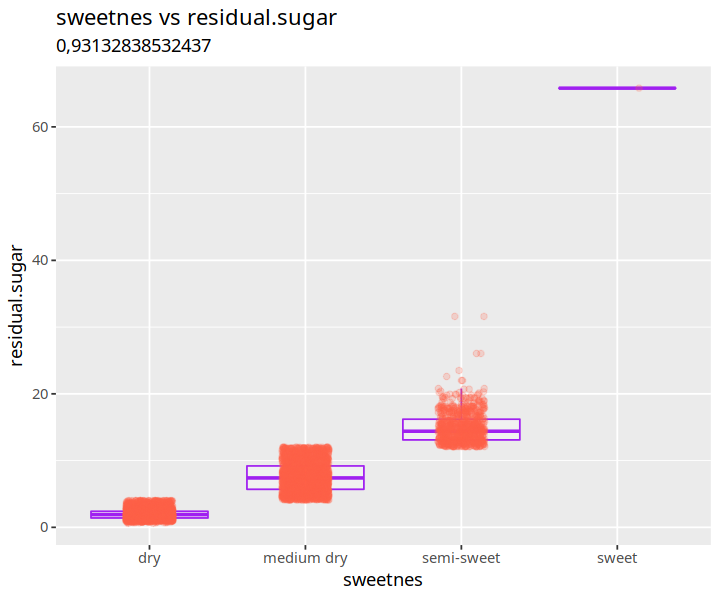

1:nrow(df): 1
------------------------------------------------------------ 
1:nrow(df): 2
------------------------------------------------------------ 
1:nrow(df): 3

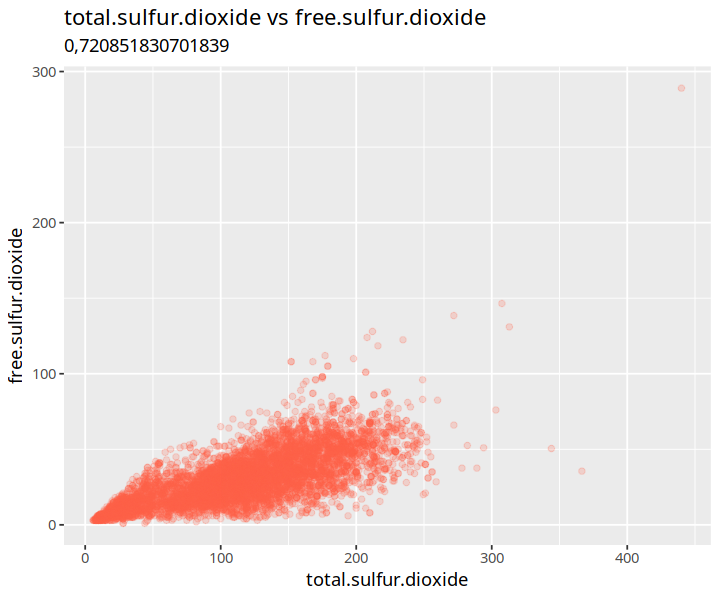

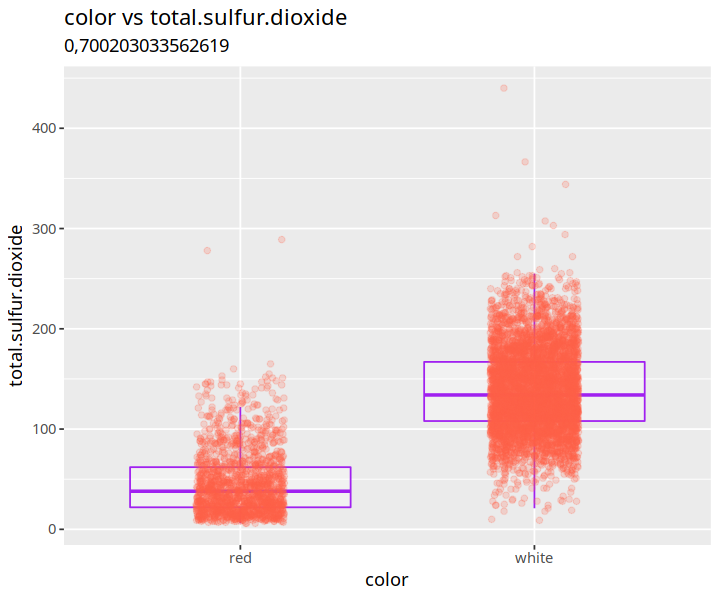

In [26]:
# Here I decided to add boxplots for categorical variables

plotCorr <- function(var1, var2, var3) {
    if (as.character(var1)=="sweetnes" | as.character(var1)=="color" ) {
        p <- ggplot(data, aes(as.factor(data_temp[[as.character(var1)]]), data_temp[[as.character(var2)]]))  +
    geom_boxplot(outlier.shape=NA, alpha = 0.3, color = "purple") + #avoid plotting outliers twice
    geom_jitter(position=position_jitter(width=.15, height=0), colour="tomato", alpha=0.2) +
    xlab(toString(var1)) +
    ylab(toString(var2)) +
    labs(title=paste(as.character(var1),"vs", as.character(var2), sep=" "), subtitle=toString(var3))
    } else {
        p <- ggplot(data, aes(data[[as.character(var1)]], data[[as.character(var2)]]))  +
    geom_point( colour="tomato", alpha=0.2) +
    xlab(toString(var1)) +
    ylab(toString(var2)) +
    labs(title=paste(as.character(var1),"vs", as.character(var2), sep=" "), subtitle=toString(var3)) 
    }
    }
by(df, 1:nrow(df), function(row) plotCorr(row[1], row[2], row[4]))

### Which parameters have strongest correlation with wine quality?

In [27]:
df= subset(setDT(melt(corr))[order(-value)], Var1!=Var2 & Var1=="quality") %>% #extract var names and order descending + remove autocorrelation
    dplyr::filter(row_number() %% 2 != 0) %>% # remove duplicates
    mutate(abs.corr = abs(value)) %>% # calc abs of correlation
    arrange(desc(abs.corr)) %>%
    top_n(5)

Selecting by abs.corr


In [28]:
df

Var1    Var2                 value       abs.corr  
1 quality alcohol               0,44426334 0,44426334
2 quality density              -0,30574059 0,30574059
3 quality chlorides            -0,20058825 0,20058825
4 quality citric.acid           0,08559590 0,08559590
5 quality total.sulfur.dioxide -0,04145882 0,04145882

In [29]:
df[1,] # strongest correlation pair

Var1    Var2    value     abs.corr 
1 quality alcohol 0,4442633 0,4442633

### Draw scatter plots of three variables that have strongest correlation with wine quality.

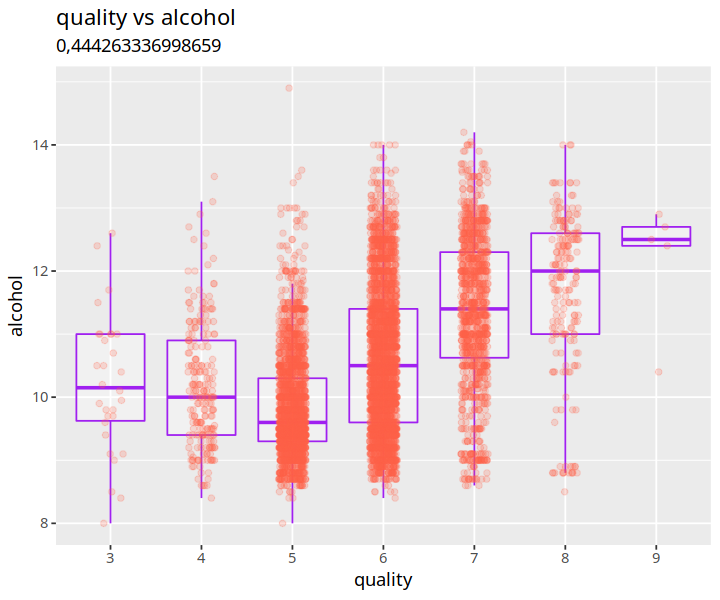

1:nrow(df): 1
------------------------------------------------------------ 
1:nrow(df): 2
------------------------------------------------------------ 
1:nrow(df): 3

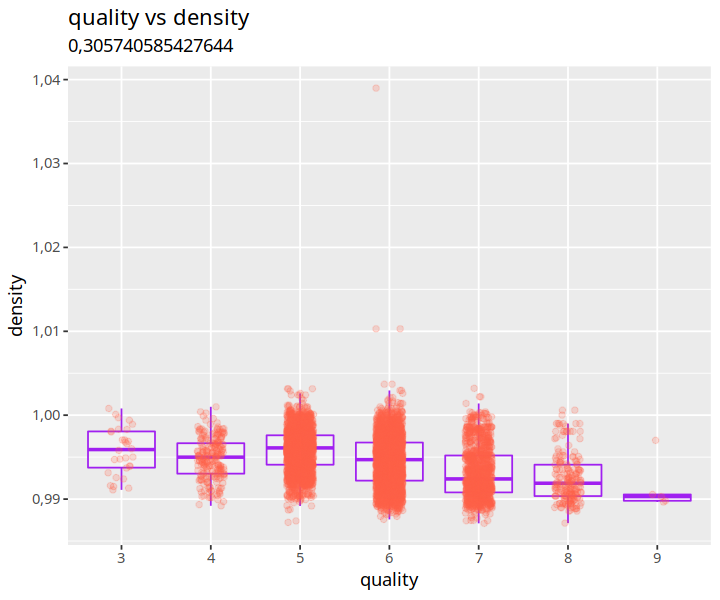

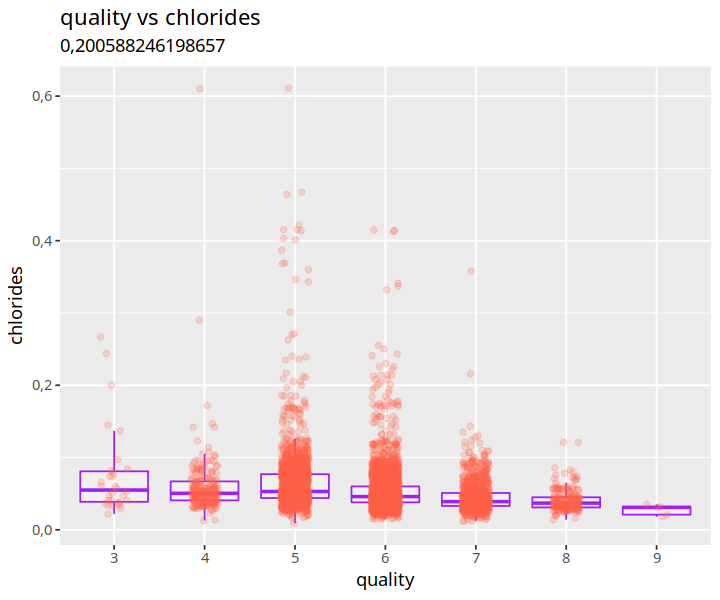

In [30]:
# important here I decided to use both positive and negative correlation
df$Var1 <- as.character(df$Var1)
df$Var2 <- as.character(df$Var2)
df <- df[1:3,]
plotCorr <- function(var1, var2, var3) {
    p <- ggplot(data, aes(as.factor(data[[as.character(var1)]]), data[[as.character(var2)]]))  +
    geom_boxplot(outlier.shape=NA, alpha = 0.3, color = "purple") + #avoid plotting outliers twice
    geom_jitter(position=position_jitter(width=.15, height=0), colour="tomato", alpha=0.2) +
    xlab(toString(var1)) +
    ylab(toString(var2)) +
    labs(title=paste(as.character(var1),"vs", as.character(var2), sep=" "), subtitle=toString(var3)) 
    }


by(df, 1:nrow(df), function(row) plotCorr(row[1], row[2], row[4]))


In [ ]:
#rmarkdown:::convert_ipynb("~/task_R.ipynb", output = xfun::with_ext("~/task_R", "Rmd"))
#rmarkdown::render("task_R.Rmd", "html_document")